# Assignment 1 - Introduction To Data Science

### Group - 2

#### Team Members

- Gaurav Singhal -    2023mt03187, 
- Deepak Khandelwal - 2023mt03164, 
- Debleena Goswami -  2023mt03099


## Problem Statement
Device crashes can lead to significant downtime and loss of productivity, especially in environments where the device plays a critical role in daily operations. Predicting when a device might crash, based on various operational and environmental factors, can help mitigate these issues by enabling preemptive measures. 
The EDA exercise aims to analyze the data considering specific parameters of a mobile device ultimately to understans the features better and enable to predict device crash when required


## The Mobile Crash Data
The data has been used from Kaggle (link Below). As a team we discussed the varios factors in a real world scenario which can lead to low performance of a mobile device. The below step enlists the columns and values of the factors like CPU Usage, APP Name (Running in the device), Memory Usage, Battery Level , Temperature , Disk Space and more. Data Contains different type of attributes ranging from Numerical, Binary to Categorical.

https://kaggle.com/datasets/3b3c13874b0aef147f9ef900dfad1a5cf88bf3235fe076630ffb14516d029c46

In [99]:
# Importing the required python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [100]:
#Load the data set
df = pd.read_csv('mobile_crash_data_1115_v1.csv')
display(df)

App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0          Netflix  35.473619     52.048420      30.172434    22.554281   
1          Twitter  98.132710     35.675450      42.987039    50.852821   
2          Discord  61.316465     60.209320      33.431911    42.385092   
3            Slack  86.208830     52.385562      65.454958    48.859789   
4           Amazon  77.266467     57.531209       3.687373    47.114118   
...            ...        ...           ...            ...          ...   
11555  Google Maps  89.834407     61.401764     122.810369    31.082843   
11556       Amazon  50.210780     49.393401     110.043715    14.901975   
11557      Netflix  60.857851     71.204257     129.408817    21.294194   
11558         Uber  72.522893     39.601110     115.882346    45.646152   
11559     Snapchat  75.175787     36.511043     136.678449    33.987108   

       Disk_Space  Network_Signal  App_Version  Error_Logs Device_Model  \
0      484.092409       77.382580          1.1           1      Model_C   
1      315.257899       88.066088          1.2           1      Model_C   
2       13.540148       26.112746          1.2           0      Model_B   
3      333.167681        9.509667          1.2           0      Model_A   
4      483.712841       13.691955          2.0           1      Model_B   
...           ...             ...          ...         ...          ...   
11555  366.066313       39.201901          1.1           1      Model_A   
11556  130.154397       48.069002          1.2           1      Model_B   
11557  229.378999       44.473365          2.0           1      Model_A   
11558   82.117291       53.128622          1.0           1      Model_B   
11559  130.103462       59.816847          2.0           0      Model_B   

       Session_Time  Num_App_Crashes  Duration_Since_Last_Charge  \
0        183.227495                1                   34.096485   
1        171.332179                2                   25.197136   
2        165.099603                1                   32.869116   
3        157.097694                1                   16.238277   
4        151.324038                2                   44.960682   
...             ...              ...                         ...   
11555    167.579146                2                   38.006320   
11556    179.100393                2                   18.695275   
11557    181.587891                2                    7.985975   
11558    177.625143                0                   12.517502   
11559    168.502618                4                   31.585281   

      App_Usage_Level Crash_Label  
0              Medium         Hig  
1              Medium         Cri  
2                 Low         Med  
3                 Low         Hig  
4                 Low         Hig  
...               ...         ...  
11555            High         Med  
11556            High         Low  
11557             Low         Low  
11558             Low         Hig  
11559            High         Cri  

[11560 rows x 15 columns]

## Objective 1. Data Understanding

Establishing the Need for Data Understanding in Mobile Device Crash Prediction. 

Mobile device data might have missing values, outliers, or noisy entries (e.g., extreme temperature readings, erroneous app usage counts). Understanding the data helps identify and rectify these issues to avoid biased predictions.
The below steps involves generating the summary statistics which includes COUNT, # of UNIQUE VALUE , # FREQUENCY, MIN, MAX values etc.
The steps intend to establish understanding on the spread of data, identify data imbalance if any and also process data in a way that can lead to meaningful results 


### Objective 1.1. Generate Summary Statitics to understand Central Tendency and Dispersion in data.


In [103]:
# Summary statistics - 
#This will do find mean and Quantiles finding central tendencies and dispersion
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


App_Name     CPU_Usage  Memory_Usage  Battery_Level   Temperature  \
count     11560  11329.000000  11329.000000   11560.000000  11329.000000   
unique       15           NaN           NaN            NaN           NaN   
top     Discord           NaN           NaN            NaN           NaN   
freq        807           NaN           NaN            NaN           NaN   
mean        NaN     62.397586     56.959348      50.304638     36.832064   
std         NaN     16.272409      9.880617      28.954965      9.403873   
min         NaN      4.310223     24.027532       0.000000     10.115146   
25%         NaN     51.389702     50.215708      25.270028     31.205169   
50%         NaN     62.486420     56.980808      50.390288     37.597585   
75%         NaN     73.819859     63.572382      74.859107     43.533911   
max         NaN     99.952131     94.278519     149.286188     55.000000   

          Disk_Space  Network_Signal   App_Version    Error_Logs Device_Model  \
count   11560.000000    11560.000000  11560.000000  11560.000000        11560   
unique           NaN             NaN           NaN           NaN            3   
top              NaN             NaN           NaN           NaN      Model_B   
freq             NaN             NaN           NaN           NaN         3893   
mean      257.773411       50.307640      1.327820      0.505709          NaN   
std       147.875113       28.929610      0.398261      0.499989          NaN   
min         0.047753        0.000930      1.000000      0.000000          NaN   
25%       129.936641       25.440228      1.000000      0.000000          NaN   
50%       257.998770       50.380077      1.200000      1.000000          NaN   
75%       386.445334       75.435823      2.000000      1.000000          NaN   
max       511.929107       99.997387      2.000000      1.000000          NaN   

        Session_Time  Num_App_Crashes  Duration_Since_Last_Charge  \
count   11560.000000     11560.000000                11560.000000   
unique           NaN              NaN                         NaN   
top              NaN              NaN                         NaN   
freq             NaN              NaN                         NaN   
mean      170.070402         1.462976                   23.875100   
std        11.999830         0.908865                   13.837832   
min       127.948335         0.000000                    0.004914   
25%       161.946831         1.000000                   12.097158   
50%       170.231241         1.000000                   23.827640   
75%       178.066092         2.000000                   35.843880   
max       215.188104         4.000000                   47.995185   

       App_Usage_Level Crash_Label  
count            11560       11560  
unique               3           4  
top             Medium         Hig  
freq              5672        4427  
mean               NaN         NaN  
std                NaN         NaN  
min                NaN         NaN  
25%                NaN         NaN  
50%                NaN         NaN  
75%                NaN         NaN  
max                NaN         NaN

#### *Observation 1.1 from Summary Statics* -  
 1. Max for Batter_Level Attribute is going beyond 100 which is not meeting the conformity as max value for Battery_Level should be 100.

### Objective 1.2 Histogram Analysis -  
For Understanding the Distribution of Data we have used Histograms for the below reasons:
#### Normality Check: 
Many machine learning models (like linear regression, logistic regression) assume that the input features are normally distributed. A histogram helps to visually assess whether the data follows a normal distribution or if it's skewed.
#### Skewness Detection: 
Data might be left-skewed or right-skewed, indicating that most values are concentrated towards the lower or upper end of the range, respectively. This can impact how you preprocess the data (e.g., applying transformations like log or square root).

We have considered numeric and continuous variables like CPU Usage, Memory Usage, Battery Level, Disk Space for evaluation of the space the data is spread. This shall further help decide on the next steps of discretization, label encoding, normalization etc.

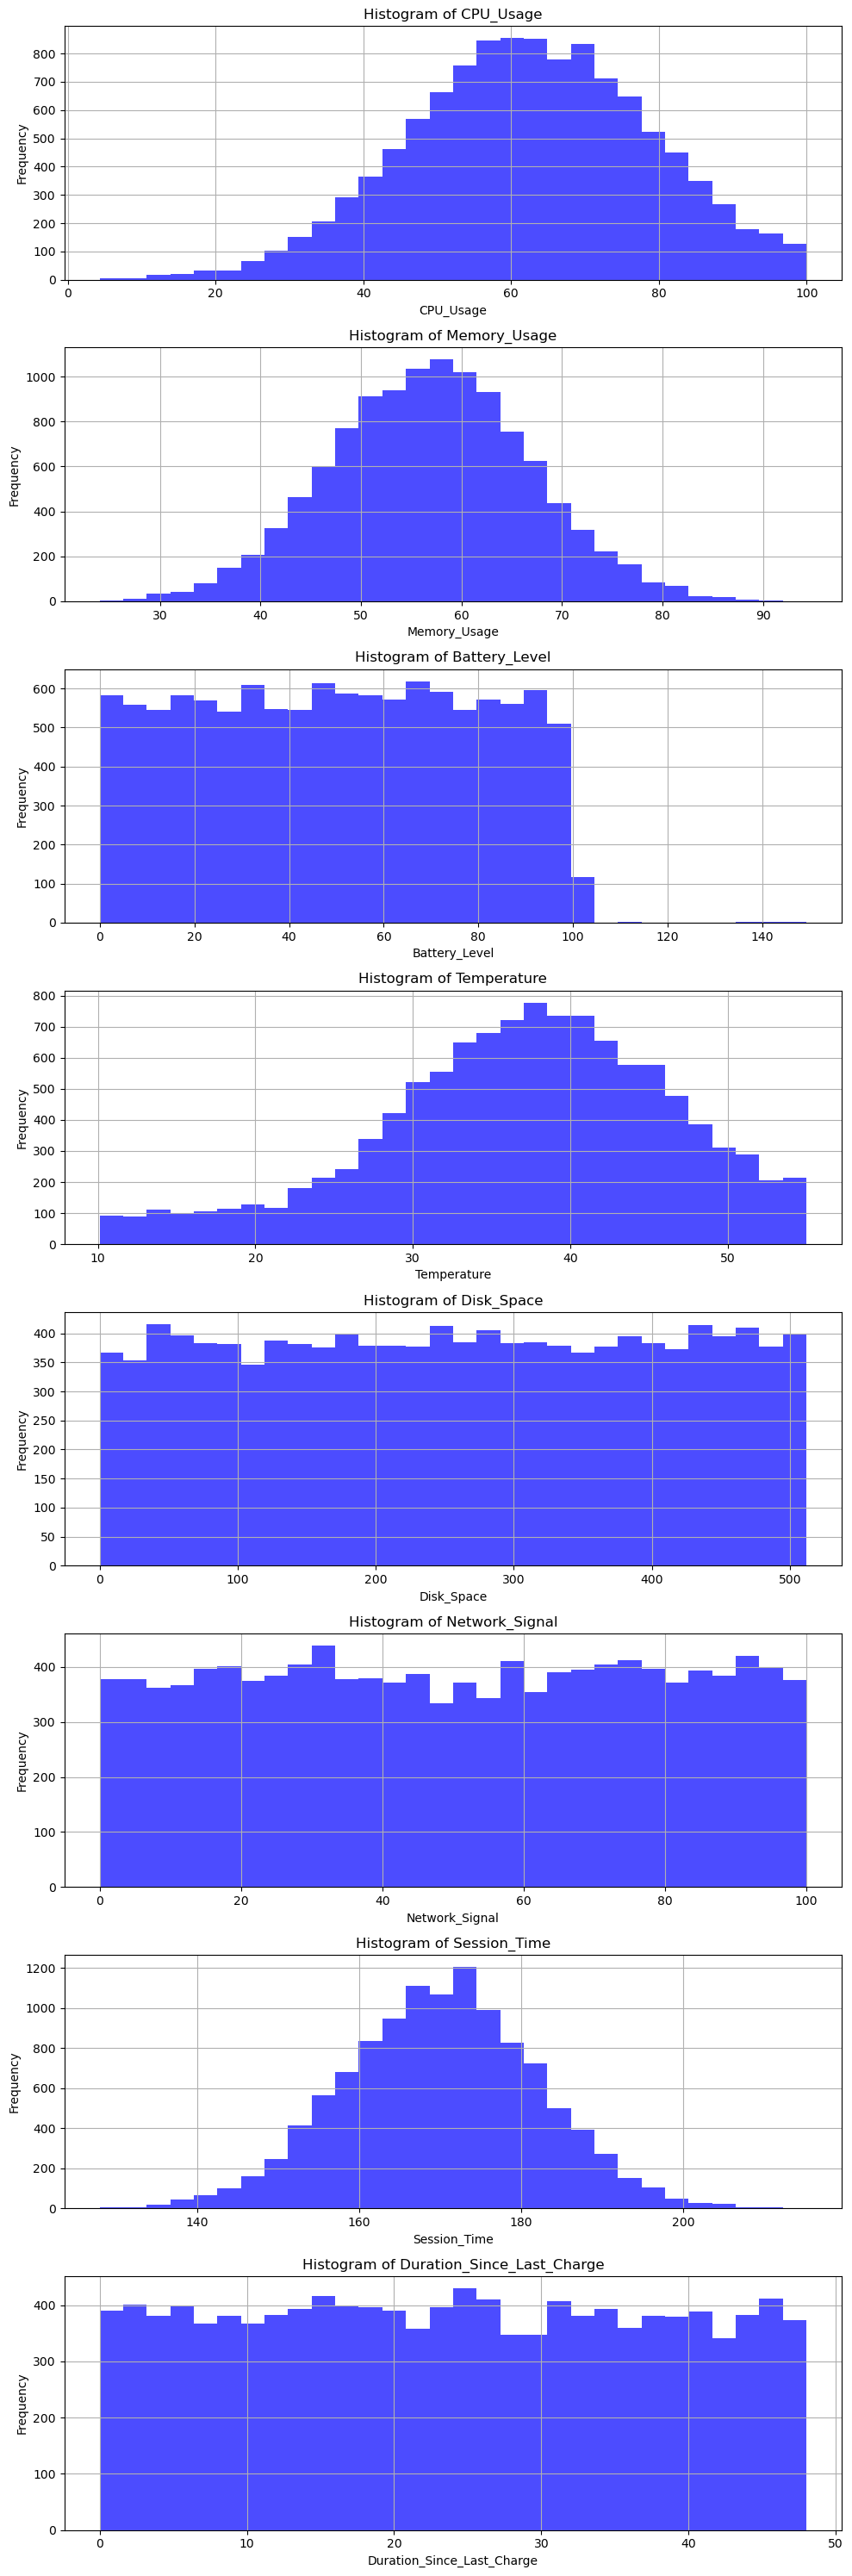

In [106]:
# Print Histograms for all numerical data (visualize data)
numeric_columns = df.select_dtypes(include='number').columns.tolist()
non_binary_non_discrete_numerical_columns = [col for col in numeric_columns if df[col].nunique() > 10]

fig, axes = plt.subplots(nrows=len(non_binary_non_discrete_numerical_columns), ncols=1, figsize=(10, 30))
# Iterate over numeric columns and create histograms
for i, column in enumerate(non_binary_non_discrete_numerical_columns):
    df[column].hist(ax=axes[i], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Observation 1.2 - Histogram

Data is left skewed for Cpu_Usage and Temprature
For attributes Duration_Since_Last_charge, Network_Signal, Disk Space, Battery_Level is largely uniformally distributed.
Session_Time and Memory_Usage are uniformly modeled.


### Objective 1.3 - Box Plot To Identify Outliers

Outlier detection and measuring Central Tendency. Here are the details of the BOX PLOT and the inferencing of the outcome from the plot:

#### Central Tendency: 
The box in the plot represents the interquartile range (IQR) and the line inside it indicates the median (50th percentile), providing a sense of where most data points cluster.For example median for CPU usage is approximately 61-65 and the IQR can be found between 50 and 70

#### Spread of the Data: 
The length of the box shows the range of the middle 50% of the data (from the 25th percentile to the 75th percentile), while the "whiskers" extend to show the variability outside the upper and lower quartiles. The data for Temperature, CPU_Usage, Disk Space shows the outliers in the lower quartiles. For Memory Usage there are instances where the outliers are observed in the upper quartiles

#### Outliers: 
Data points outside the whiskers are considered potential outliers. These are flagged with individual dots, helping to identify anomalies or rare occurrences in the dataset.

#### Skewness & Symmetry: 
The position of the median line within the box and the length of the whiskers help assess the skewness of the data. If the median is not centered or one whisker is longer, the data may be skewed either left or right.

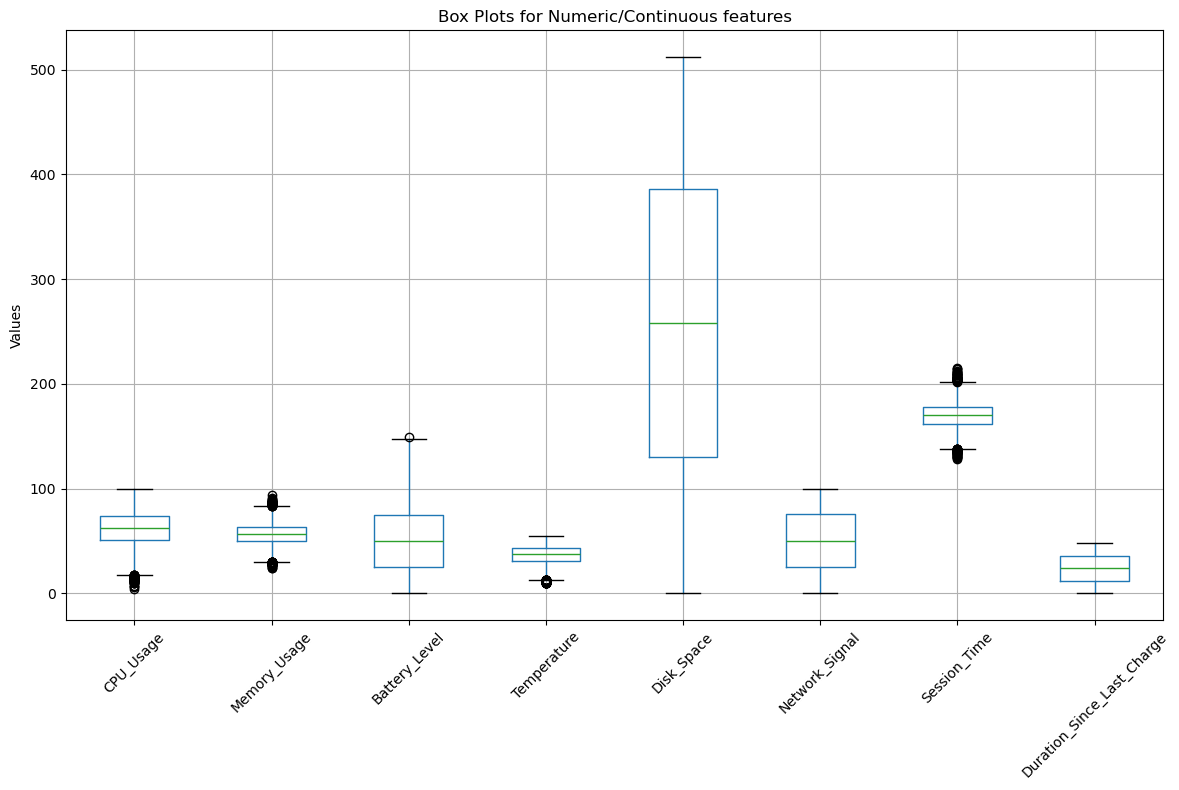

In [109]:
# Box Plot of numeric coloumns
import pandas as pd
import matplotlib.pyplot as plt

# Get numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()
non_binary_non_discrete_numerical_columns = [col for col in numeric_columns if df[col].nunique() > 10]
new_df = df[non_binary_non_discrete_numerical_columns]
fig, ax = plt.subplots(figsize=(12, 8))
# Create box plots
new_df.boxplot(ax=ax)
plt.title("Box Plots for Numeric/Continuous features")
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation 1.3 

Outlier is often defined as any point that falls outside 1.5 times the interquartile range (IQR) above the 75th percentile (upper quartile) or below the 25th percentile (lower quartile) in a box plot. In normal distributions, points that are more than three standard deviations away from the mean

In above box plot Cpu_Usage, Memory_Usage, Battery_Level, Temprature, Session_Time have outliers. While Disk_Space, Network_Signal, Duration_Since_Last_Recharge do not have any out lier.

### Objective 1.4 Looking for Missing Value 

In [112]:
# Checking for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


App_Name                        0
CPU_Usage                     231
Memory_Usage                  231
Battery_Level                   0
Temperature                   231
Disk_Space                      0
Network_Signal                  0
App_Version                     0
Error_Logs                      0
Device_Model                    0
Session_Time                    0
Num_App_Crashes                 0
Duration_Since_Last_Charge      0
App_Usage_Level                 0
Crash_Label                     0
dtype: int64

## Objective 2 - Data Quality Checks and Cleanup

From Above understanding of data we could see issue related to Conformity in Battery_Level, Missing Value for Column Cpu_Usage, Temprature, and Battery_Level, Also outliers for multiple attributes as noted in above observations.

### Objective 2.1 - Cleanup Battery_Level, remove data objects above values 100.

In [115]:
# Find records greater than 100 in 'Battery Level' which is beyond conformity
outliers = df[df['Battery_Level'] > 100]
print("\nRecords greater than 100:")
print(outliers['Battery_Level'])

# Remove records greater than 100
cleaned_data = df[df['Battery_Level'] <= 100]

outliers = cleaned_data[cleaned_data['Battery_Level'] > 100]
print("\nRecords greater than 100:")
display(outliers['Battery_Level'])


Records greater than 100:
11548    149.286188
11549    146.987775
11550    138.980624
11551    141.555246
11552    139.083107
11553    142.135888
11554    112.648205
11555    122.810369
11556    110.043715
11557    129.408817
11558    115.882346
11559    136.678449
Name: Battery_Level, dtype: float64

Records greater than 100:


Series([], Name: Battery_Level, dtype: float64)

### Objective 2.2 Identify outliers in all numeric coloumns and remove those records.


cleaned_data summary
          CPU_Usage  Memory_Usage  Battery_Level   Temperature    Disk_Space  \
count  11317.000000  11317.000000   11548.000000  11317.000000  11548.000000   
mean      62.396201     56.960900      50.219615     36.838100    257.815966   
std       16.275145      9.876400      28.846484      9.401749    147.880769   
min        4.310223     24.027532       0.000000     10.115146      0.047753   
25%       51.401378     50.218679      25.264509     31.214783    129.893457   
50%       62.487586     56.980808      50.375528     37.598273    258.065780   
75%       73.819859     63.572382      74.780431     43.535505    386.511185   
max       99.952131     94.278519     100.000000     55.000000    511.929107   

       Network_Signal   App_Version    Error_Logs  Session_Time  \
count    11548.000000  11548.000000  11548.000000  11548.000000   
mean        50.303771      1.327684      0.505715    170.068714   
std         28.935591      0.398166      0.499989     12.

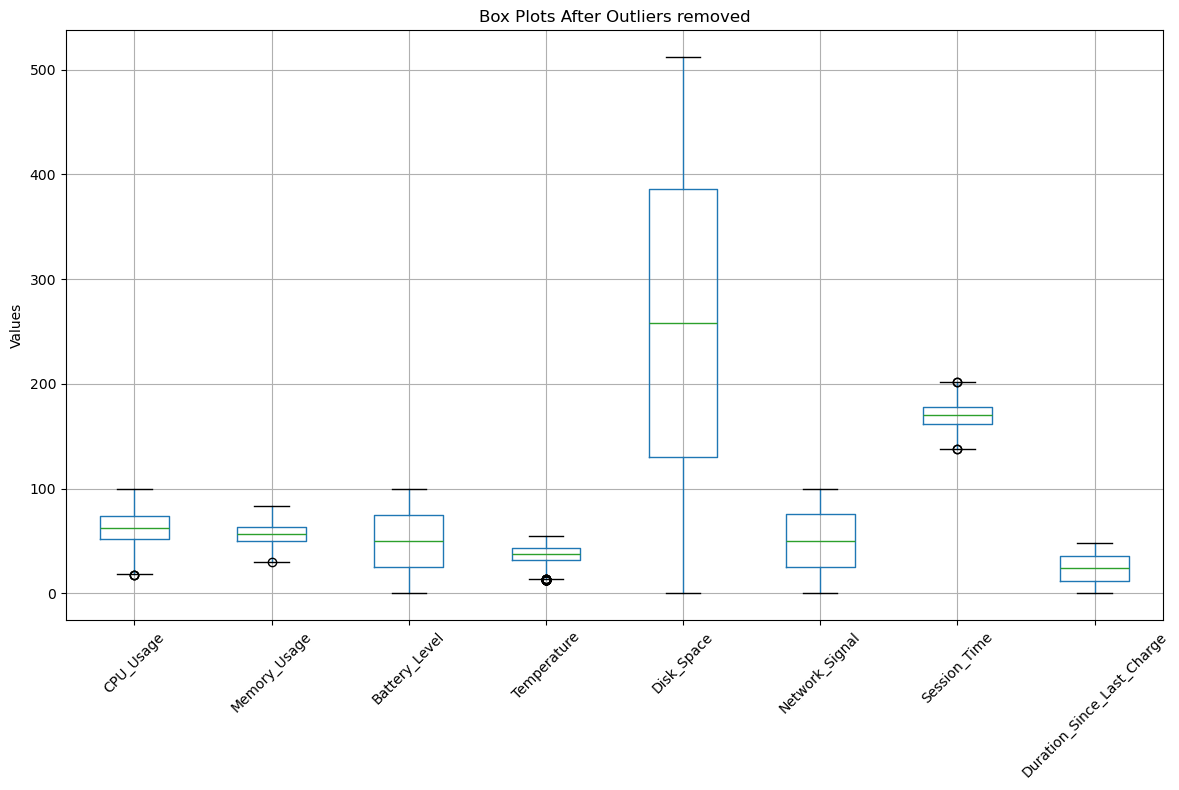

In [117]:
# Identify outliers in all numeric coloumns
new_df = cleaned_data.copy()
numeric_cols = cleaned_data.select_dtypes(include=np.number).columns
non_binary_non_discrete_numerical_columns = [col for col in numeric_cols if cleaned_data[col].nunique() > 10]

print(f"cleaned_data summary")
print(f"=======================================================================")
print(cleaned_data.describe())
for col in non_binary_non_discrete_numerical_columns:
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{col}, Outliers Range[lb, ub] => [{lower_bound},  {upper_bound}] ")
    print(f"=====================================================================")
    filtered_df = cleaned_data[(cleaned_data[col] < lower_bound) | (cleaned_data[col] > upper_bound)]
    if not filtered_df.empty:
        print(filtered_df.head(4))
        print(f"\n")
    # removing outliers in this coloumn
    temp_df = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    new_df[col] = temp_df[col]

non_binary_non_discrete_numerical_columns = [col for col in numeric_cols if new_df[col].nunique() > 10]
non_binary_non_discrete_numerical_columns_df =  new_df[non_binary_non_discrete_numerical_columns]

fig, ax = plt.subplots(figsize=(12, 8))
# Create box plots
non_binary_non_discrete_numerical_columns_df.boxplot(ax=ax)
#new_df.boxplot(ax=ax)

plt.title("Box Plots After Outliers removed")
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cleaned_data = new_df

### Objective 2.3 - Fill Missing values using mean, median and forward fill..

In [119]:
# Missing values
print("\nMissing Values Before Imputation:")
print(cleaned_data.isnull().sum())

cleaned_data['CPU_Usage']=cleaned_data['CPU_Usage'].fillna(cleaned_data['CPU_Usage'].mean())

cleaned_data['Memory_Usage']=cleaned_data['Memory_Usage'].fillna(cleaned_data['Memory_Usage'].median())

cleaned_data['Temperature']=cleaned_data['Temperature'].ffill()
cleaned_data['Session_Time']=cleaned_data['Session_Time'].fillna(cleaned_data['Session_Time'].median())


print("\nMissing Values after imputation:")
print(cleaned_data.isnull().sum())

## round to 2 decimal digit
cleaned_data = cleaned_data.round(2)
display(cleaned_data)


Missing Values Before Imputation:
App_Name                        0
CPU_Usage                     281
Memory_Usage                  308
Battery_Level                   0
Temperature                   390
Disk_Space                      0
Network_Signal                  0
App_Version                     0
Error_Logs                      0
Device_Model                    0
Session_Time                   97
Num_App_Crashes                 0
Duration_Since_Last_Charge      0
App_Usage_Level                 0
Crash_Label                     0
dtype: int64

Missing Values after imputation:
App_Name                      0
CPU_Usage                     0
Memory_Usage                  0
Battery_Level                 0
Temperature                   0
Disk_Space                    0
Network_Signal                0
App_Version                   0
Error_Logs                    0
Device_Model                  0
Session_Time                  0
Num_App_Crashes               0
Duration_Since_Last_Char

App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0        Netflix      35.47         52.05          30.17        22.55   
1        Twitter      98.13         35.68          42.99        50.85   
2        Discord      61.32         60.21          33.43        42.39   
3          Slack      86.21         52.39          65.45        48.86   
4         Amazon      77.27         57.53           3.69        47.11   
...          ...        ...           ...            ...          ...   
11543  Instagram      73.49         57.95          85.08        29.07   
11544       Uber      64.50         46.77          17.43        35.29   
11545  Instagram      30.56         79.29          82.77        49.81   
11546     Amazon      37.57         47.94          66.12        22.76   
11547      Slack      68.23         59.59         100.00        21.31   

       Disk_Space  Network_Signal  App_Version  Error_Logs Device_Model  \
0          484.09           77.38          1.1           1      Model_C   
1          315.26           88.07          1.2           1      Model_C   
2           13.54           26.11          1.2           0      Model_B   
3          333.17            9.51          1.2           0      Model_A   
4          483.71           13.69          2.0           1      Model_B   
...           ...             ...          ...         ...          ...   
11543      234.37           52.66          2.0           0      Model_B   
11544       17.56           20.65          1.2           0      Model_C   
11545      336.58            0.38          2.0           1      Model_A   
11546      130.19           98.05          1.1           1      Model_B   
11547      147.79           93.83          1.2           0      Model_B   

       Session_Time  Num_App_Crashes  Duration_Since_Last_Charge  \
0            183.23                1                       34.10   
1            171.33                2                       25.20   
2            165.10                1                       32.87   
3            157.10                1                       16.24   
4            151.32                2                       44.96   
...             ...              ...                         ...   
11543        166.75                2                        6.48   
11544        178.27                4                       39.68   
11545        163.04                1                        6.91   
11546        164.14                1                       16.24   
11547        172.40                1                        0.35   

      App_Usage_Level Crash_Label  
0              Medium         Hig  
1              Medium         Cri  
2                 Low         Med  
3                 Low         Hig  
4                 Low         Hig  
...               ...         ...  
11543             Low         Low  
11544             Low         Med  
11545            High         Hig  
11546          Medium         Low  
11547            High         Low  

[11548 rows x 15 columns]

## Objective 3 - Data Preprocessing
Based on above understanding of data, this step will involve
1. Discritization of Battery_Level using Binning into 6 distinct ranges.
2. Label Encoding of Categorical Attributes to make all attributes numeric
3. Data Normalization

### Objective 3.1 Binning involves grouping continuous data into discrete categories or bins.
 Discretization is a process of converting continuous variables into discrete #. Involves binning and converting values into predefined categories based on certain criteria.
##### Distance binning
#####  Formula -> interval = (max-min) / Number of Bins
##### Let us consider the 'Session_Time' continuous value column for binning

In [122]:
min_value = cleaned_data['Session_Time'].min()
max_value = cleaned_data['Session_Time'].max()
# Suppose the bin size is 4
# Returns num evenly spaced samples, calculated over the interval [start, stop].
bins = np.linspace(min_value,max_value,4)
display(bins)

array([137.96      , 159.36333333, 180.76666667, 202.17      ])

#### Labeling and grouping into fixed categories

In [124]:
labels = ['Low', 'Medium', 'High'];

# We need to specify the bins and the labels.
cleaned_data['Session_Time'] = pd.cut(cleaned_data['Session_Time'], bins=bins, labels=labels, include_lowest=True)
display(cleaned_data['Session_Time'])


0          High
1        Medium
2        Medium
3           Low
4           Low
          ...  
11543    Medium
11544    Medium
11545    Medium
11546    Medium
11547    Medium
Name: Session_Time, Length: 11548, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

### Objective 3.2 Use Label Encoder to make all categorical attributes as numerical

There are 4 categorical attributes - App_Usage_Level, Device_Model, App_Name, Battery_Level. As  models only understand numerical values, its important to convert all categorical attributes to numerical.


In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
cleaned_data['App_Usage_Level']=le.fit_transform(cleaned_data['App_Usage_Level'])

cleaned_data['Device_Model']=le.fit_transform(cleaned_data['Device_Model'])

cleaned_data['App_Name']=le.fit_transform(cleaned_data['App_Name'])

cleaned_data['Session_Time']=le.fit_transform(cleaned_data['Session_Time'])

cleaned_data['Crash_Label']=le.fit_transform(cleaned_data['Crash_Label'])


# Validate if now all attributes are numerical
print("\nData Types:")
display(cleaned_data.dtypes)

display(cleaned_data)


Data Types:


App_Name                        int32
CPU_Usage                     float64
Memory_Usage                  float64
Battery_Level                 float64
Temperature                   float64
Disk_Space                    float64
Network_Signal                float64
App_Version                   float64
Error_Logs                      int64
Device_Model                    int32
Session_Time                    int32
Num_App_Crashes                 int64
Duration_Since_Last_Charge    float64
App_Usage_Level                 int32
Crash_Label                     int32
dtype: object

App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0             6      35.47         52.05          30.17        22.55   
1            11      98.13         35.68          42.99        50.85   
2             1      61.32         60.21          33.43        42.39   
3             7      86.21         52.39          65.45        48.86   
4             0      77.27         57.53           3.69        47.11   
...         ...        ...           ...            ...          ...   
11543         4      73.49         57.95          85.08        29.07   
11544        12      64.50         46.77          17.43        35.29   
11545         4      30.56         79.29          82.77        49.81   
11546         0      37.57         47.94          66.12        22.76   
11547         7      68.23         59.59         100.00        21.31   

       Disk_Space  Network_Signal  App_Version  Error_Logs  Device_Model  \
0          484.09           77.38          1.1           1             2   
1          315.26           88.07          1.2           1             2   
2           13.54           26.11          1.2           0             1   
3          333.17            9.51          1.2           0             0   
4          483.71           13.69          2.0           1             1   
...           ...             ...          ...         ...           ...   
11543      234.37           52.66          2.0           0             1   
11544       17.56           20.65          1.2           0             2   
11545      336.58            0.38          2.0           1             0   
11546      130.19           98.05          1.1           1             1   
11547      147.79           93.83          1.2           0             1   

       Session_Time  Num_App_Crashes  Duration_Since_Last_Charge  \
0                 0                1                       34.10   
1                 2                2                       25.20   
2                 2                1                       32.87   
3                 1                1                       16.24   
4                 1                2                       44.96   
...             ...              ...                         ...   
11543             2                2                        6.48   
11544             2                4                       39.68   
11545             2                1                        6.91   
11546             2                1                       16.24   
11547             2                1                        0.35   

       App_Usage_Level  Crash_Label  
0                    2            1  
1                    2            0  
2                    1            3  
3                    1            1  
4                    1            1  
...                ...          ...  
11543                1            2  
11544                1            3  
11545                0            1  
11546                2            2  
11547                0            2  

[11548 rows x 15 columns]

 ## Objective 4 - Feature Selection

 Implement feature selection techniques and display the top 5 features that contribute the most to the
classification task.

 ### Objective 4.1 - Using Pearson Correlation to find correlation between different attributes as well as with label attribute to do Fetaure Selection.

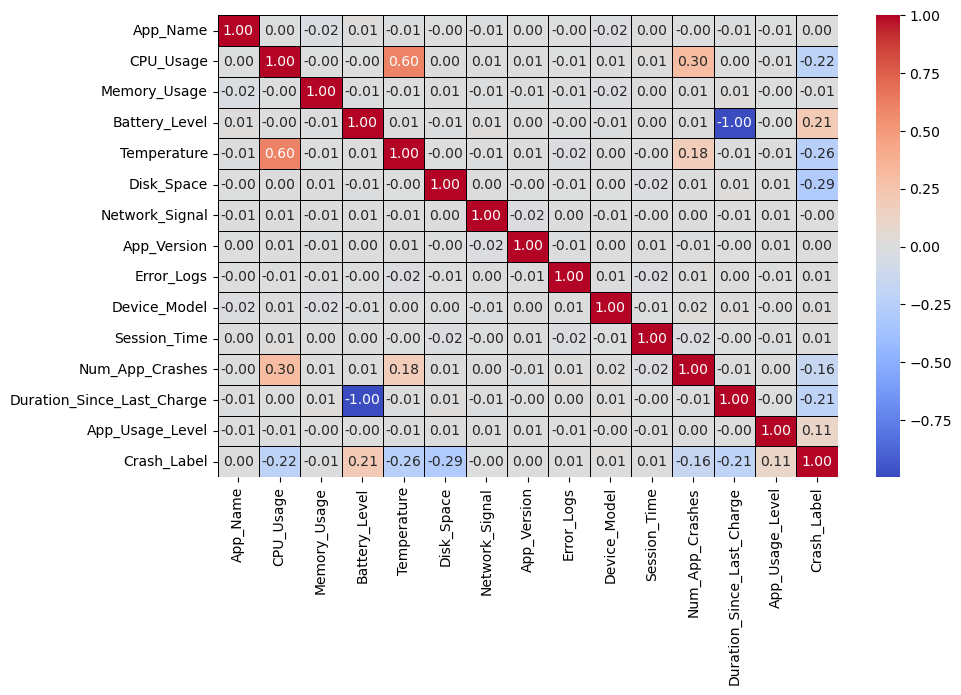

In [129]:
from tkinter import TRUE 
# Correlation Matrix - Internally uses Pearson Correlation
cor = cleaned_data.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
#sns.heatmap(cor, annot=True)
sns.heatmap(
    cor,
    annot=True,              # Annotate cells with their values
    fmt=".2f",              # Format for annotation
    cmap='coolwarm',        # Color map
    cbar=True,              # Show color bar
    linewidths=.5,          # Lines between cells
    linecolor='black',       # Color of the lines
    square=False,            # Make cells square-shaped
    xticklabels=True,       # Show x-tick labels
    yticklabels=True        # Show y-tick labels
)
plt.show()

 ### *Strong Correlations* 
 CPU Usage and Temperature (0.60) There is a significant positive correlation, suggesting that higher CPU usage typically leads to increased temperature. Battery Level and Duration Since Last Charge (-1.00): This perfect negative correlation indicates that as the time since the last charge increases, the battery level decreases as expected 


### *Moderate Correlations*
Num App Crashes and CPU Usage (0.30): Indicates a moderate positive correlation, meaning that higher CPU usage may be associated with more application crashes.
Thermal Effects: Temperature also has a moderate correlation with Battery Level (0.18), perhaps suggesting that a higher temperature can influence battery performance

### *Weak or Negligible Correlations*
Many pairs of features, such as Memory Usage and Disk Space (-0.01), indicate weak or no correlation, suggesting they do not significantly impact each other.Session Time shows minimal correlation with most other variables
Crash Label Considerations:
The Crash Label shows weak to moderate correlations with several variables, including CPU Usage (-0.22) and Network Signal (-0.29), which could imply that these factors might play a role in whether an app crashes, though the correlation is not strong


### *Insight on Network and App Performance*
Network Signal and Error Logs show weak correlations with the other variables, suggesting that connectivity issues may not significantly affect app performance metrics like CPU and memory usage.

 ### Generating Scatter Plot for Cpu_usage and Temprature to visulatize scatter plot and finding the standard deviation of values

11548
11548
Pearson correlation: -0.998


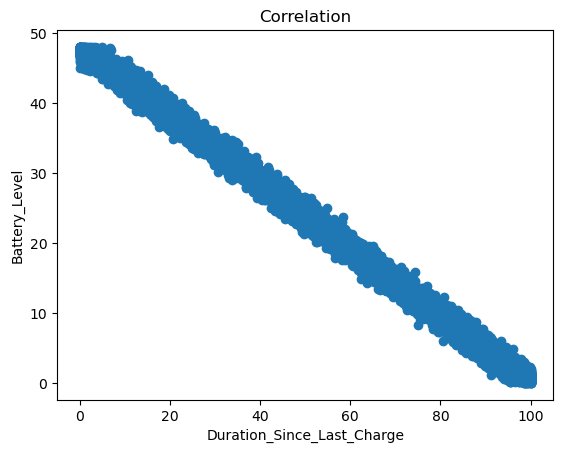

In [135]:
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = cleaned_data['Battery_Level']
list2 = cleaned_data['Duration_Since_Last_Charge']
print(list1.size)
print(list2.size)

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearson correlation: %.3f' % corr)

# Pearson correlation: 0.205 (Moderate Positive correlation)
# Interpretaton:
# As the CPU usage of the device increases, heat also increases

# Draw a Plot of the relationship
# 'CPU' on the X Axis and 'Memory' on the Y axis
from matplotlib import pyplot
pyplot.scatter(list1, list2)
plt.title("Correlation")
plt.ylabel('Battery_Level')
plt.xlabel('Duration_Since_Last_Charge')
pyplot.show()

 ### Objective 4.2

1. Removing Duration_Since_Last_charge as it is redundent 

In [137]:
# Removing Duration_Since_Last_charge as it is redundent

data_cleaned = cleaned_data.drop(columns=['Duration_Since_Last_Charge'])
display(data_cleaned.dtypes)


App_Name             int32
CPU_Usage          float64
Memory_Usage       float64
Battery_Level      float64
Temperature        float64
Disk_Space         float64
Network_Signal     float64
App_Version        float64
Error_Logs           int64
Device_Model         int32
Session_Time         int32
Num_App_Crashes      int64
App_Usage_Level      int32
Crash_Label          int32
dtype: object

 ### Objective 4.3

1. Finding top 5 features that contribute the most to the classification task.

   Though it is clear from Heatmap what features are important and impacting the Crash_Label, We will be using FeatureImportance mechanism to visualize it.

In [139]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()

#App_Name           float64   0
#CPU_Usage          float64   1
#Memory_Usage       float64   2
#Battery_Level      float64   3
#Temperature        float64   4
#Disk_Space         float64   5
#Network_Signal     float64   6
#App_Version        float64   7
#Error_Logs         float64   8
#Device_Model       float64   9
#Session_Time       float64  10
#Num_App_Crashes    float64  11
#App_Usage_Level    float64  12
#Crash_Label        float64  13
dtype: object


C:\Users\dbanerjee\OneDrive - Microsoft\Anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature: App_Name, Score: 0.00278
Feature: CPU_Usage, Score: 0.07214
Feature: Memory_Usage, Score: 0.02640
Feature: Battery_Level, Score: 0.23789
Feature: Temperature, Score: 0.31773
Feature: Disk_Space, Score: 0.25601
Feature: Network_Signal, Score: 0.00524
Feature: App_Version, Score: 0.00129
Feature: Error_Logs, Score: 0.00056
Feature: Device_Model, Score: 0.00082
Feature: Session_Time, Score: 0.00082
Feature: Num_App_Crashes, Score: 0.02548
Feature: App_Usage_Level, Score: 0.05285


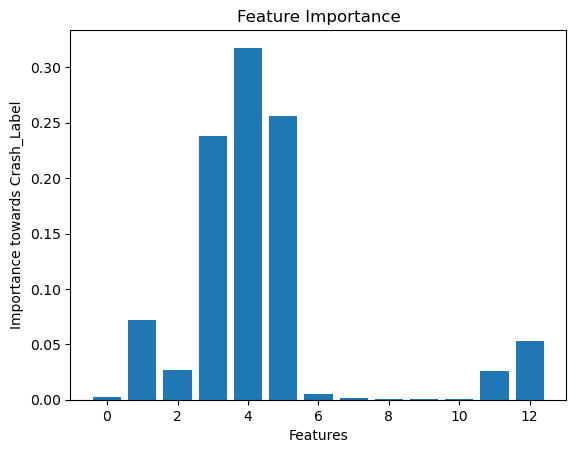

In [140]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()

X = data_cleaned.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]] 
Y = data_cleaned.iloc[:,[13]]  

# fit the model
model.fit(X,Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	#print('Feature: %0d, Score: %.5f' % (i,v))
    print(f'Feature: {X.columns[i]}, Score: {v:.5f}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.ylabel('Importance towards Crash_Label')
plt.xlabel('Features')
plt.show()

In [141]:
# Drop redundenent, or irrelevent features

data_cleaned = data_cleaned.drop(columns=['App_Version'])
data_cleaned = data_cleaned.drop(columns=['App_Name'])
data_cleaned = data_cleaned.drop(columns=['Error_Logs'])
data_cleaned = data_cleaned.drop(columns=['Device_Model'])
data_cleaned = data_cleaned.drop(columns=['Session_Time'])
data_cleaned = data_cleaned.drop(columns=['Network_Signal'])




display(data_cleaned.dtypes)

CPU_Usage          float64
Memory_Usage       float64
Battery_Level      float64
Temperature        float64
Disk_Space         float64
Num_App_Crashes      int64
App_Usage_Level      int32
Crash_Label          int32
dtype: object

In [142]:
#1. Split the Cleaned Dataframe into Train and Test Dataset

from sklearn.model_selection import train_test_split


# Split the data into features (X) and target (y)
X = data_cleaned.drop('Crash_Label', axis=1)  # Features (independent variables)
y = data_cleaned['Crash_Label']               # Target (dependent variable)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the split data
print("Training Features:\n", X_train)
print("Test Features:\n", X_test)
print("Training Labels:\n", y_train)
print("Test Labels:\n", y_test)

Training Features:
        CPU_Usage  Memory_Usage  Battery_Level  Temperature  Disk_Space  \
7460       62.61         67.65          83.87        45.24       11.55   
5969       83.39         56.19           9.39        45.54      267.54   
8902       71.30         80.43          27.70        41.75       13.93   
7952       75.96         47.94          89.18        45.53      499.90   
6482       36.76         75.60          53.72        29.45      426.24   
...          ...           ...            ...          ...         ...   
11284      51.36         76.06           8.31        19.41      278.57   
5191       36.18         52.27          15.96        41.58      417.33   
5390       47.20         46.48          10.51        33.75       44.81   
860        32.91         47.70          89.25        28.82      436.78   
7270       36.89         70.08          26.74        28.89       62.50   

       Num_App_Crashes  App_Usage_Level  
7460                 1                2  
5969   

In [196]:
##2. Implement a decision tree classifier using scikit-learn's DecisionTreeClassifier class.
##3. Train the decision tree classifier on the training dataset.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the DecisionTreeClassifier model
model = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)


model = DecisionTreeClassifier(
    #min_samples_leaf=10,
    random_state=42,
    #min_samples_split=20,
    #class_weight='balanced',
    max_depth=10,
    #max_features="sqrt"

)

# Train the model using the training data
model.fit(X_train, y_train)

print("Decision Tree Model Classified")

Decision Tree Model Classified


Observation - 
max_depth - Accuracy
30 - .96
10 = .96   - Final Value
9=.95
7=.93
6-.91
5=.88


In [198]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import display, HTML


# Predict the target values using the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
#report=classification_report(y_test, y_pred)
#display(HTML(f"<pre>{report}</pre>"))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       345
           1       0.97      0.97      0.97       877
           2       0.96      0.97      0.97       635
           3       0.94      0.94      0.94       453

    accuracy                           0.96      2310
   macro avg       0.95      0.95      0.95      2310
weighted avg       0.96      0.96      0.96      2310

Confusion Matrix:
 [[322  10  10   3]
 [ 10 848   3  16]
 [  1   7 617  10]
 [  4  12  12 425]]


In [146]:
# Feature names (replace with your own names)


feature_names = ['CPU_Usage', 'Memory_Usage', 'Battery_Level', 'Temperature','Disk_Space','Num_App_Crashes','App_Usage_Level']

# Class names (replace with your own class labels)
target_names = ['Crash_Label']

# extact the class names
class_int = data_cleaned['Crash_Label'].unique().tolist()

print(class_int)
class_names = ['High', 'Critical', 'Medium', 'Low']

# map the class names to the class number as specified in the dataset

dictionary = dict(zip(class_names, class_int))

print(dictionary)

[1, 0, 3, 2]
{'High': 1, 'Critical': 0, 'Medium': 3, 'Low': 2}


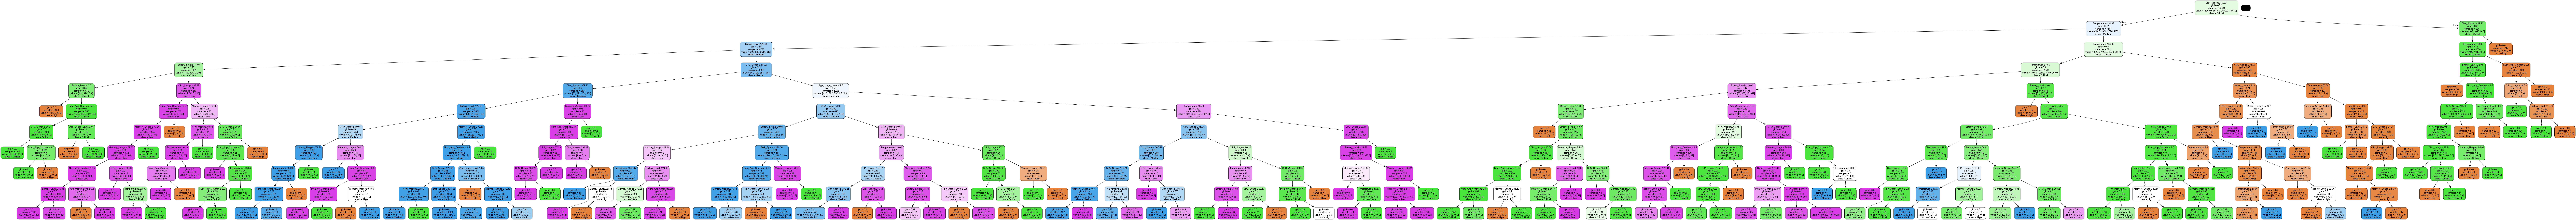

In [147]:
# Vizualize the tree

# set the path to graphviz
import os  # Windows OS
#os.environ["PATH"] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graphviz' # Windows OS


# import the necessary libraries
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# may need to install
# pip install pydotplus

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = feature_names,
                class_names = class_names,
                proportion = False, precision = 2,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

 #### *Observation 4.3*

1. Top 5 Features contributing most in descending order -
   - Temperature
   - Battery_Level
   - Disk_Space
   - App_Usage_Level
   - Num_App_Crashes


   Thankyou !
   
   
   
     

In [206]:
# Create the DecisionTreeClassifier model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=42) 
# Define the parameter grid 
param_grid = { 'max_depth': [None, 1, 2, 3, 4, 5], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8], 'criterion': ['gini', 'entropy']}

Decision Tree Model Classified


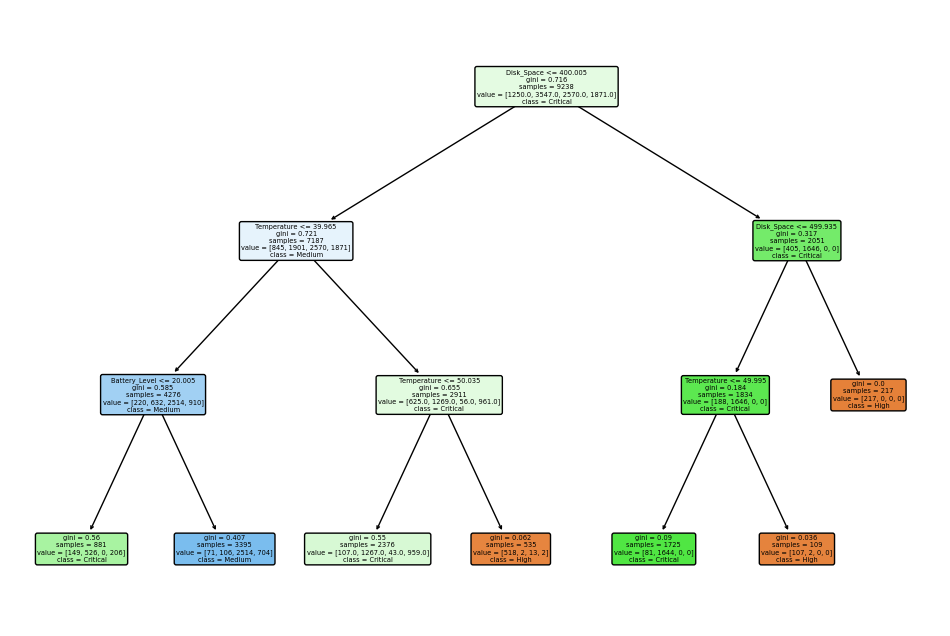

In [208]:
### Changing Max Depth to 3 to limit the Tree Depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the DecisionTreeClassifier model
model = DecisionTreeClassifier(max_depth=3, random_state=20)

# Train the model using the training data
model.fit(X_train, y_train)

print("Decision Tree Model Classified")

# Feature names (replace with your own names)
feature_names = ['CPU_Usage', 'Memory_Usage', 'Battery_Level', 'Temperature','Disk_Space','Num_App_Crashes','App_Usage_Level']

# Class names (replace with your own class labels)
target_names = ['Crash_Label']

# Visualize the tree using matplotlib
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True,feature_names = feature_names,
                class_names = class_names,rounded=True)
plt.show()



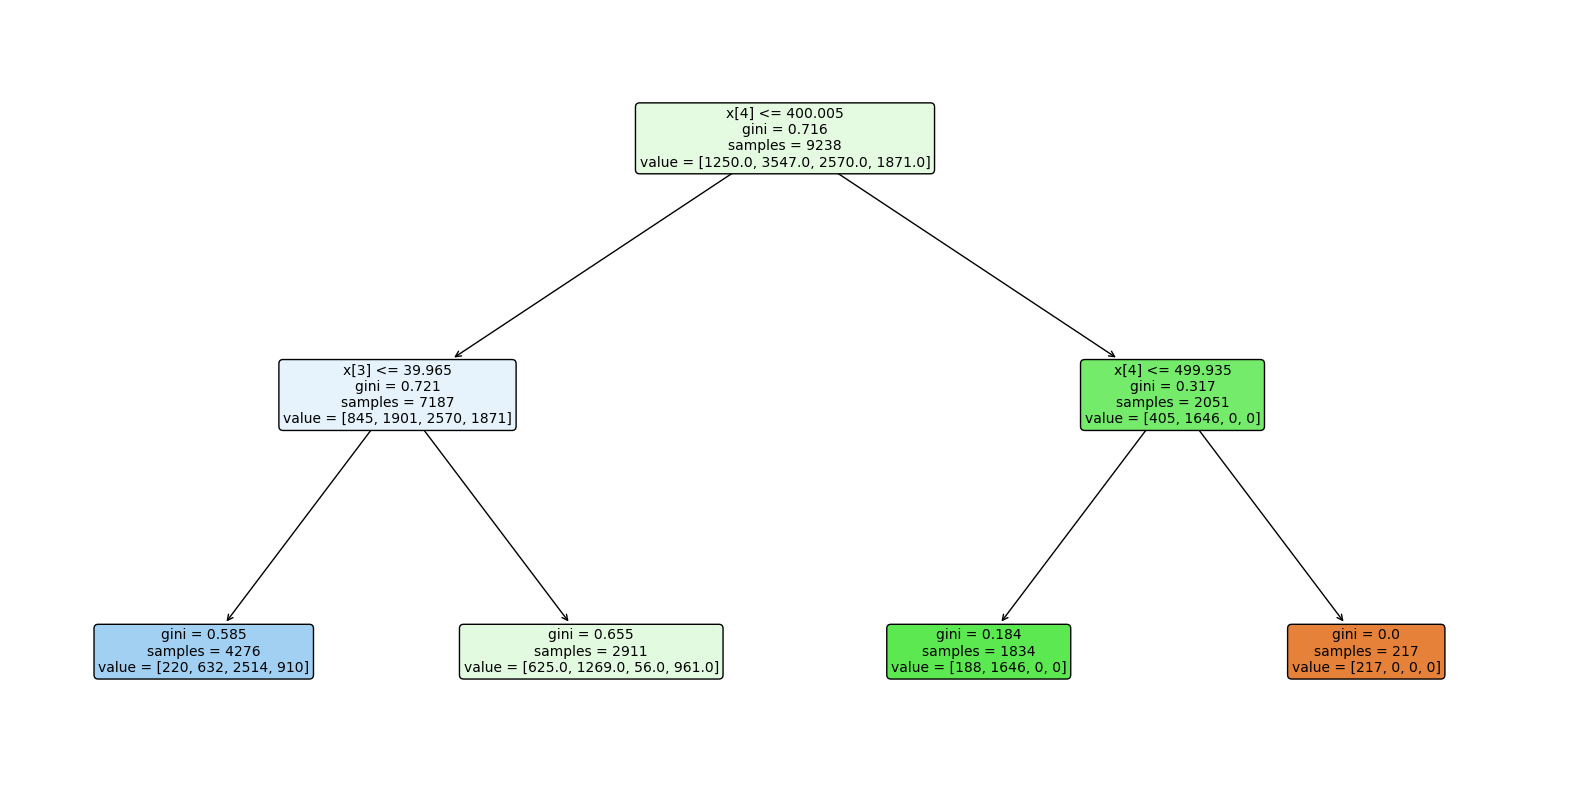

In [151]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, rounded=True, fontsize=10) 
plt.show()

Root Node Split: The tree splits first based on CPU_Usage, indicating it is the most significant feature for the first decision.
Node Purity: The Gini index values provide insight into the purity of the nodes, with lower values indicating purer nodes.
Sample Distribution: The distribution of samples across nodes helps understand where most crashes (or non-crashes) are predicted.
Feature Importance: CPU_Usage and Memory_Usage are highlighted as critical features in this decision tree.

===== Untuned Model =====
Accuracy: 0.9571
Confusion Matrix:
[[331   7   4   3]
 [  8 839   7  23]
 [  1  10 614  10]
 [  3  11  12 427]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       345
           1       0.97      0.96      0.96       877
           2       0.96      0.97      0.97       635
           3       0.92      0.94      0.93       453

    accuracy                           0.96      2310
   macro avg       0.95      0.96      0.96      2310
weighted avg       0.96      0.96      0.96      2310


===== Tuned Model =====
Accuracy: 0.8442
Confusion Matrix:
[[278  41  24   2]
 [  6 778  20  73]
 [  2   4 624   5]
 [  1   4 178 270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       345
           1       0.94      0.89      0.91       877
           2       0.74      0.98      0.84       635
           3       0.77    

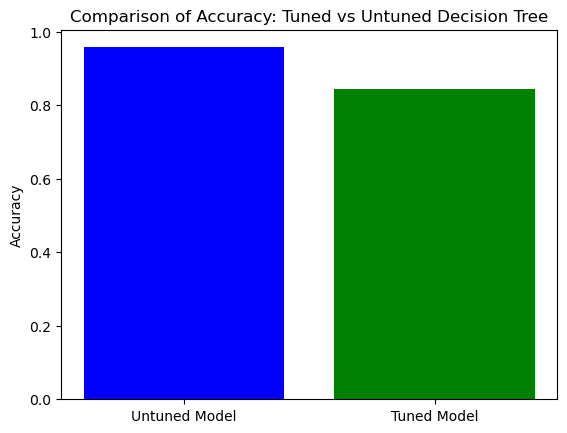

In [210]:
#### Evaluate the performance of the tuned model and compare it with the untuned model.

# 1. Train Untuned Decision Tree (using default hyperparameters)
untuned_model = DecisionTreeClassifier(random_state=42)
untuned_model.fit(X_train, y_train)

# 2. Train Tuned Decision Tree (with hyperparameter tuning)
tuned_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=4, criterion='entropy', random_state=42)
tuned_model.fit(X_train, y_train)

# 3. Evaluate the models using Accuracy, Confusion Matrix, and Classification Report
# Untuned model evaluation
y_pred_untuned = untuned_model.predict(X_test)
accuracy_untuned = accuracy_score(y_test, y_pred_untuned)
conf_matrix_untuned = confusion_matrix(y_test, y_pred_untuned)
class_report_untuned = classification_report(y_test, y_pred_untuned)

# Tuned model evaluation
y_pred_tuned = tuned_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
class_report_tuned = classification_report(y_test, y_pred_tuned)

# 4. Print Evaluation Metrics

print("===== Untuned Model =====")
print(f"Accuracy: {accuracy_untuned:.4f}")
print("Confusion Matrix:")
print(conf_matrix_untuned)
print("Classification Report:")
print(class_report_untuned)

print("\n===== Tuned Model =====")
print(f"Accuracy: {accuracy_tuned:.4f}")
print("Confusion Matrix:")
print(conf_matrix_tuned)
print("Classification Report:")
print(class_report_tuned)

# 5. Plot the comparison of accuracy
models = ['Untuned Model', 'Tuned Model']
accuracies = [accuracy_untuned, accuracy_tuned]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy: Tuned vs Untuned Decision Tree')
plt.show()

#### A learning curve typically plots the training and validation accuracy (or loss) against the number of training samples. It helps visualize how well a model learns as more data is introduced.

#### * Untuned Model: The learning curve for the untuned model shows a higher training accuracy compared to validation accuracy, indicating overfitting. This is due to default hyperparameters are used, as the model might memorize the training data without generalizing well to unseen dat

#### *Tuned Model: The learning curve for the tuned model is expected to show improved validation accuracy, indicating better generalization. As hyperparameters are optimized (e.g., setting max_depth, min_samples_split, etc.), the model should perform better on the validation set, reflecting a more balanced learning process.

 #### *The learning curves of both models are plotted, we see the tuned model's curve converges more closely with the training curve, suggesting that the tuning process has helped the model learn more effectively from the training data while maintaining good performance on validation data.

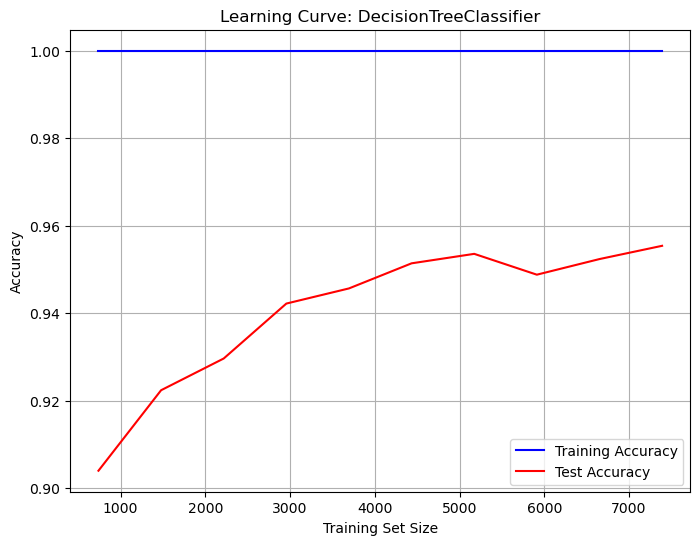

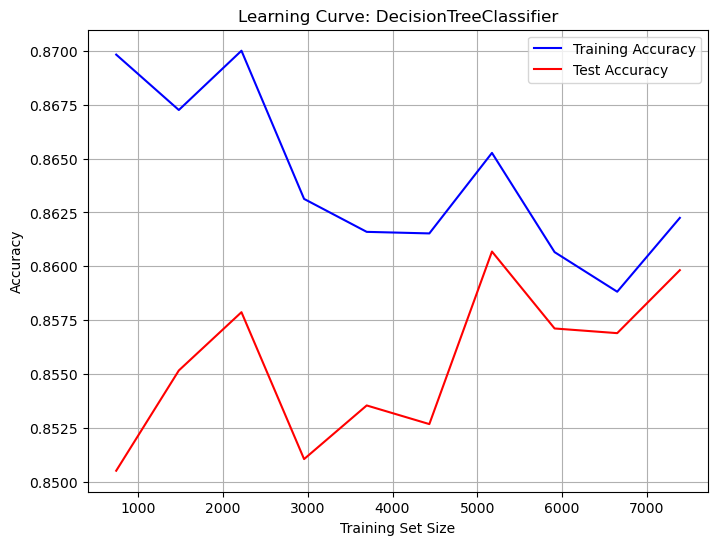

In [158]:
#### This can help you visualize if the model is overfitting (training accuracy much higher than test accuracy)
####  or underfitting (both accuracies low).

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', 
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Accuracy", color='blue')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Accuracy", color='red')
    plt.title(f"Learning Curve: {model.__class__.__name__}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(untuned_model, X_train, y_train)
plot_learning_curve(tuned_model, X_train, y_train)

#### *The tuned model shows a significant improvement in validation accuracy, it suggests that the hyperparameter tuning was effective.

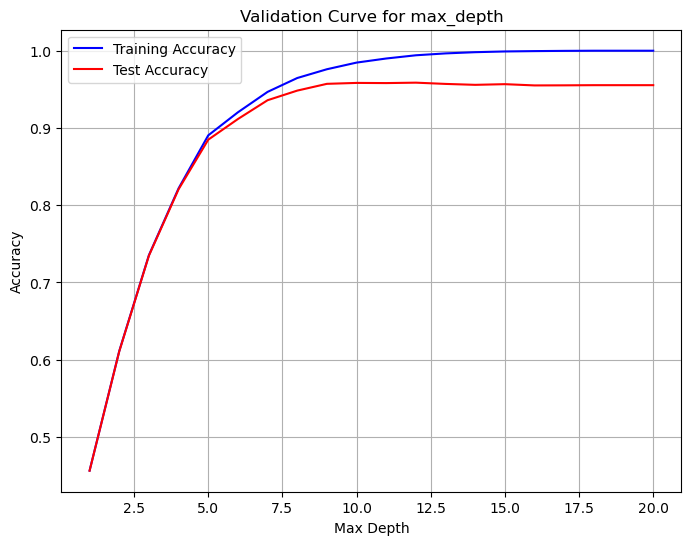

In [160]:
#### Validation Curve - Validation curves help visualize the model's performance as you vary a particular hyperparameter 
#### (e.g., max_depth, min_samples_split, etc.). 
#### This can help you understand how sensitive the model is to changes in hyperparameters and whether you are overfitting or underfitting.

from sklearn.model_selection import validation_curve

param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=42), 
                                             X_train, y_train, param_name="max_depth", 
                                             param_range=param_range, cv=5, scoring="accuracy")

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Accuracy", color='blue')
plt.plot(param_range, np.mean(test_scores, axis=1), label="Test Accuracy", color='red')
plt.title("Validation Curve for max_depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


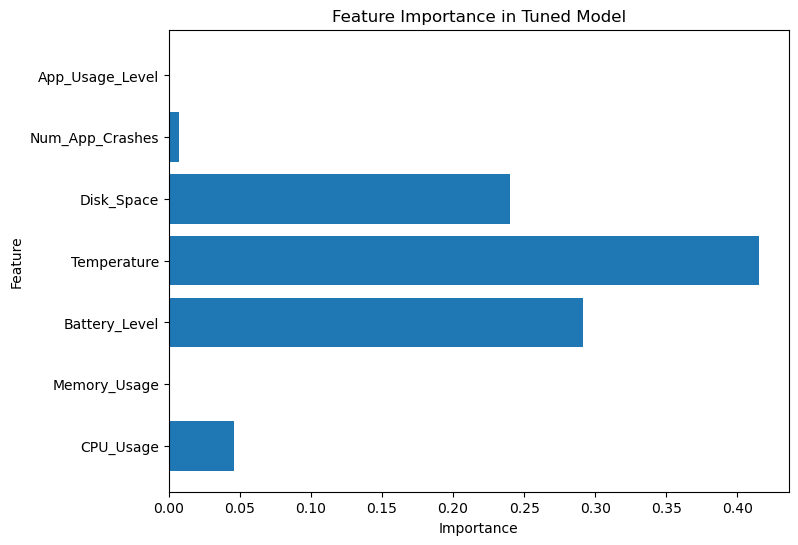

In [161]:
# Display feature importance for the tuned model
feature_importance = tuned_model.feature_importances_

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.title("Feature Importance in Tuned Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


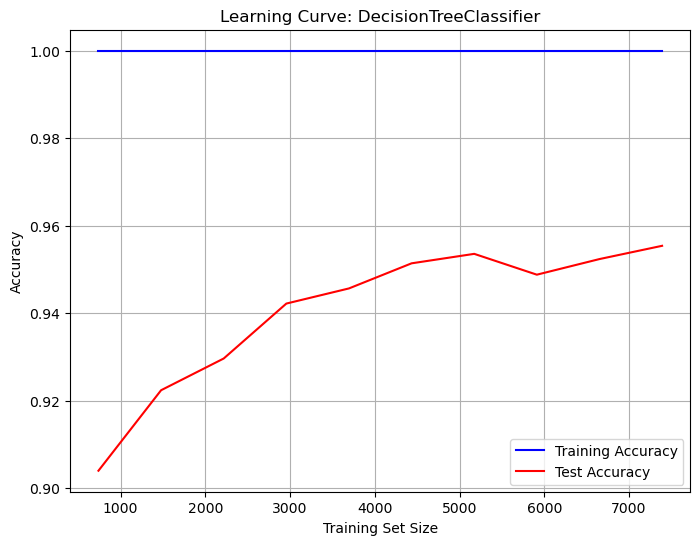

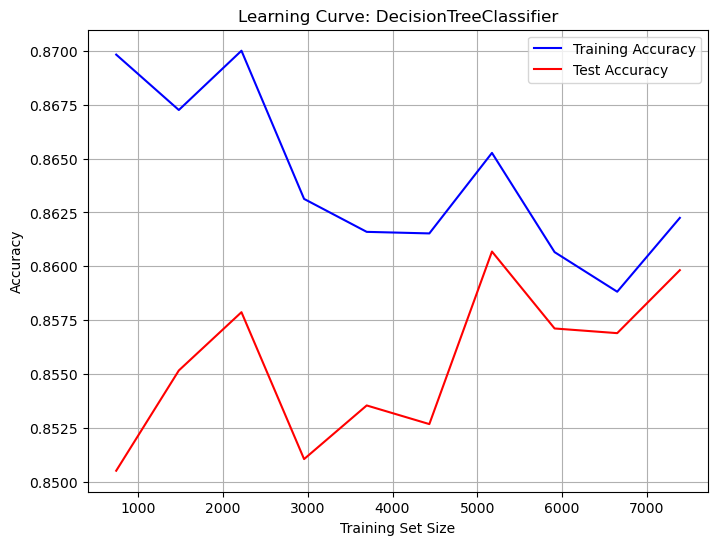

In [162]:
##### Learning Curve - plot the model’s performance (accuracy or error) as a function of the number of training examples. 
#### This can help you visualize if the model is overfitting (training accuracy much higher than test accuracy)
####  or underfitting (both accuracies low).

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', 
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Accuracy", color='blue')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Accuracy", color='red')
    plt.title(f"Learning Curve: {model.__class__.__name__}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(untuned_model, X_train, y_train)
plot_learning_curve(tuned_model, X_train, y_train)